## Student Info

* Student name: Dương Trường Bình
* Student ID: 21127229

## Project Info

This project aims to get hands-on experience in implementing some Classification and clustering algorithms taught in Data Mining and Applications course.

There are 2 exercises in this project:
* Binary classification using Decision Tree (ID3 algorithm)
* Data clustering with K-means clustering

## Instructions

### How to finish

To finish the project, fill in:
- ```YOUR CODE HERE``` in code cells

- ```Your answer here``` in text cells.


<font color='red'>**NOTE:**</font>

- Your project must be finished by your own self. You may discuss with the others, but must not copy (partially or entirely) their codes or solutions. You will receive a <font color='red'>0 point</font> for this project if you violate this plagiarism rule.

- You can create new cells to clarify your code / answer, however, please <font color='red'>do not delete any pre-defined code cells or test case cells</font> as it may affect the grading results.

- The given test cases (if any) are used to only assist your code debugging / unit testing. Passing these test cases does not necessarily mean you will get the maximum point for the exercise.

### How to submit

In the grading stage, I will first select `Kernel` - `Restart Kernel & Run All Cells` to restart and run all cells in your notebook. As a result, before submitting your project, you should run `Kernel` - `Restart Kernel & Run All Cells` to ensure your code will run as you expect.

After that, rename your notebook as `ID.ipynb` (e.g. `21120123.ipynb`) and submit on Moodle.

<font color=red>Please follow the above submission guidelines. Any violation of these instructions may cost you some penalty points!!!</font>


## Exercise 1: Classification (6 points)

### Requirements

You will need to implement Decision Tree algorithm (ID3) in Python language.

**Description**:

- In this exercise, you only need to build a decision tree model using categorical attributes (no need to handle numerical attributes). You may transform numerical attributes into categorical before feeding into classification model.

- A sample belongs to either one of the given labels (binary classification).

- Dataset: [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) and [titanic2.txt](https://drive.google.com/file/d/1IwOxcPz-Hq1_JOOfGylJxy1TYhDvfEsg/view?usp=sharing)


You will need to implement `load_data` function and DecisionTree class with the following methods:

- ```fit```: build tree from given dataset, using ID3 algorithm

- ```predict```: make predictions on new data points using the trained decision tree

- ```visualize```: plot trained decision tree from training dataset. You may choose how to visualize the trained model, as long as the tree structure of the model is clarified (you may use available visualization packages such as ```tree``` or ```graphviz```, or implement the visualization code yourself). For example, a simple representation of a decision tree built from [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) dataset may look like:


```
outlook = sunny
|  humidity = high: no
|  humidity = normal: yes
outlook = overcast: yes
outlook = rainy
|  windy = TRUE: no
|  windy = FALSE: yes
```

**Note**:

- For [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) dataset, you can use all samples for training without spliting into train and test set. For [titanic2.txt](https://drive.google.com/file/d/1IwOxcPz-Hq1_JOOfGylJxy1TYhDvfEsg/view?usp=sharing) dataset, you may need to split into train/test with the ratio of 80/20 (use ```sklearn.model_selection.train_test_split``` with ```random_state=520``` for reproducibility)

- ```load_data``` function and ```DecisionTree``` class must be implemented once only and be usable for different datasets

- For each dataset, you need to ```load_data``` from input files, ```fit``` train dataset into model, use the trained model to ```predict``` on ```X_train``` and ```X_test``` (if any), calculate accuracy (use ```sklearn.metrics.accuracy_score```), and eventually ```visualize``` trained model

### Implementation (6 points)

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# 1
### Description: data loading and categorization (if any)

def load_data(file_path: str, split: bool = True):
    """
    Load data from file_path and return numpy data

    Parameters
    ----------
    file_path : str
        The path of input data file (tab separated).
    split : bool
        Whether or not to return test set.

    Returns
    ----------
    (X_train, y_train)
    
    : training numpy array if split = False, else
    (X_train, y_train), (X_test, y_test): training and testing numpy array if split = True
    """

    with open(file_path, 'r') as f:
        lines = f.readlines()
    headers = lines[0].strip().split('\t')
    data = np.array([line.strip().split('\t') for line in lines[1:]])
    X_train = data[:, :-1]
    y_train = data[:, -1]
    
    if split:
        X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=520)
        #add headers to the data
        X_train = np.vstack([headers[:-1]] + X_train.tolist())
        X_test = np.vstack([headers[:-1]] + X_test.tolist())
        return X_train, y_train, X_test, y_test
    else:
        X_train = np.vstack([headers[:-1]] + X_train.tolist())
        return X_train, y_train, None, None

In [3]:
# 4

# Decision Tree class
# You should implement the ID3 algorithm here
# You can add other utility methods to make your code easy to read :) 

class DecisionTree:
    def __init__(self):
        # YOUR CODE HERE
        """
        Initialize the Decision Tree Classifier
        
        Parameters
        ----------
        tree: dictionary
            Store the tree structure
        features: list
            Store names of features in the dataset
        """
        self.tree = {}
        self.features = None
        
    def cal_entropy(self, y):
        """
        Calculate the entropy of the target variable
        
        Parameters
        ----------
        y : numpy array
            The target variable
        
        Returns
        ----------
        entropy: float
            The entropy of the target variable
        """
        y_unique, y_counts = np.unique(y, return_counts=True)
        p = y_counts / len(y)
        return -np.sum(p * np.log2(p))

    def fit(self, X_train, y_train):
        # 3
        # YOUR CODE HERE
        """
        Fit the Decision Tree Classifier by building the tree
        
        Parameters
        ----------
        X_train : numpy array
            The training data
        y_train : numpy array
            The target variable of training data
            
        Returns
        ----------
        None
        """
        self.features = X_train[0]
        X_train = X_train[1:]
        features_index = np.arange(len(self.features))
        self.tree = self.build_tree(X_train, y_train, features_index)
        
    def build_tree(self, X, y, features_index):
        """
        Build the tree recursively
        
        Parameters
        ----------
        X : numpy array
            The training data
        y : numpy array
            The target variable of training data
        features_index : numpy array
            The indices of features that can be used to split the data
            
        Returns
        ----------
        tree: dictionary
            The tree structure built by the ID3 algorithm
        """
        if len(np.unique(y)) <= 1:
            return np.unique(y)[0]
        elif len(y) == 0 or len(features_index) == 0:
            return np.unique(y)[np.argmax(np.unique(y, return_counts=True)[1])]
        
        best_attribute = self.find_best_attribute(X, y, features_index)
        tree = {self.features[best_attribute]: {}}
        unique_values = np.unique(X[:,best_attribute])
        
        for value in unique_values:
            index = X[:,best_attribute] == value
            X_subset = X[index]
            y_subset = y[index]
            new_features_index = features_index[features_index != best_attribute]
            tree[self.features[best_attribute]][value] = self.build_tree(X_subset, y_subset, new_features_index)
            
        return tree
    
    def find_best_attribute(self, X, y, features_index):
        """
        Find the best attribute to split the data
        
        Parameters
        ----------
        X : numpy array
            The training data
        y : numpy array
            The target variable of training data
        features_index : numpy array
            The indices of features that can be used to split the data
        
        Returns
        ----------
        best_attribute: int
            The index of the best attribute to split the data
        """
        best_attribute = features_index[0]
        best_info_gain = 0
        entropy = self.cal_entropy(y)
        for i in features_index:
            unique_values = np.unique(X[:,i])
            new_entropy = 0
            for value in unique_values:
                index = X[:,i] == value
                y_subset = y[index]
                new_entropy += len(y_subset) / len(y) * self.cal_entropy(y_subset)
            info_gain = entropy - new_entropy
            if info_gain > best_info_gain:
                best_info_gain = info_gain
                best_attribute = i
        
        return best_attribute

    def predict(self, X_test):
        # 0.5
        # YOUR CODE HERE
        """
        Predict the target variable of the testing data by predicting each instance one by one
        
        Parameters
        ----------
        X_test : numpy array
            The testing data
        
        Returns
        ----------
        y_pred: list
            The predicted target variable of the testing data
        """
        y_pred = []
        for x in X_test[1:]:
            y_pred.append(self.predict_single(x))
        return y_pred
    
    def predict_single(self, x):
        """
        Predict the target variable of a single instance by traversing the tree
        
        Parameters
        ----------
        x : numpy array
            A single instance
            
        Returns
        ----------
        y_pred: str
            The predicted target variable of the instance
        """
        tree = self.tree
        while type(tree) == dict:
            key = list(tree.keys())[0]
            feature_index = np.where(self.features == key)[0][0]
            value = x[feature_index]
            if value in tree[key]:
                tree = tree[key][value]
            else:
                return np.unique(list(tree[key].values()))[0]
        return tree
    

    def visualize(self):
        # 0.5
        # YOUR CODE HERE
        """
        Visualize the tree structure by printing the tree in simple text format
        
        Parameters
        ----------
        None
        
        Returns
        ----------
        None, but print the tree structure
        
        """
        for node in self.tree:
            node_value = self.tree[node]
            self.print_tree(node, node_value)
        
    def print_tree(self, node_name, node_values, depth=0):
        """
        Print the tree structure recursively
        
        Parameters
        ----------
        node_name : str
            The name of the current node
        node_values : dictionary
            The values of the current node
        depth : int
            The depth of the current node in the tree
            
        Returns
        ----------
        None, but print the tree structure
        """
        for value in node_values:
            if type(node_values[value]) == dict:
                print(f"{'|  ' * depth}{node_name} = {value}")
                sub_tree = node_values[value]
                new_node = list(sub_tree.keys())[0]
                new_node_value = sub_tree[new_node]
                self.print_tree(new_node, new_node_value, depth + 1)
            else:
                print(f"{'|  ' * depth}{node_name} = {value}: {node_values[value]}")

In [4]:
# 0.5 = 0.25 (tennis dataset) + 0.25 (titanic2 dataset) 

### NOTE: Flow to run your code (do this for all your datasets)

# dataset 1 (create one cell for each dataset with the following content)

tree = DecisionTree()
X_train, y_train, X_test, y_test = load_data("data/tennis.txt", split=False)
tree.fit(X_train, y_train)
y_hat_train = tree.predict(X_train) 
acc_train = accuracy_score(y_train, y_hat_train)
# y_hat_test = tree.predict(X_test) 
# acc_test = accuracy_score(y_test, y_hat_test)
print(f"Accuracy on training set: {acc_train}")
tree.visualize()

Accuracy on training set: 1.0
outlook = overcast: yes
outlook = rain
|  wind = strong: no
|  wind = weak: yes
outlook = sunny
|  humidity = high: no
|  humidity = normal: yes


In [5]:
# 0.5 = 0.25 (tennis dataset) + 0.25 (titanic2 dataset) 

### NOTE: Flow to run your code (do this for all your datasets)

# dataset 2 (create one cell for each dataset with the following content)

tree = DecisionTree()
X_train, y_train, X_test, y_test = load_data("data/titanic2.txt")
tree.fit(X_train, y_train)
y_hat_train = tree.predict(X_train)
acc_train = accuracy_score(y_train, y_hat_train)
print(f"Accuracy on training set: {acc_train}")
y_hat_test = tree.predict(X_test)
acc_test = accuracy_score(y_test, y_hat_test)
print(f"Accuracy on test set: {acc_test}")
tree.visualize()

Accuracy on training set: 0.7914772727272728
Accuracy on test set: 0.7868480725623582
sex = female
|  pclass = 1st
|  |  age = adult: yes
|  pclass = 2nd
|  |  age = adult: yes
|  |  age = child: yes
|  pclass = 3rd
|  |  age = adult: no
|  |  age = child: no
|  pclass = crew
|  |  age = adult: yes
sex = male
|  pclass = 1st
|  |  age = adult: no
|  |  age = child: yes
|  pclass = 2nd
|  |  age = adult: no
|  |  age = child: yes
|  pclass = 3rd
|  |  age = adult: no
|  |  age = child: no
|  pclass = crew
|  |  age = adult: no


### Answer the following question (0.5 points)

**Question 1:** Your comments on the accuracy scores between train and test sets on ```titanic2``` dataset? Elaborate, explain and propose a solution

---

*Your answer here*

1. Nhận xét: 

- Đối với tập dữ liệu ```titanic2```, ta thấy rằng độ chính xác trên tập train là 0.791% và trên tập test là 0.78%. Độ chính xác trên hai tập khá gần nhau, không có sự chênh lệ lớn giữa hai tập dữ liệu. Tuy nhiên, độ chính xác trên tập train cao hơn so với tập test một chút cho thấy mô hình có dấu hiệu overfitting.

- Overfitting là hiện tượng mô hình học quá nhiều thông tin từ tập dữ liệu train, dẫn đến việc mô hình không thể tổng quát hóa tốt trên tập dữ liệu test. Điều này dẫn đến việc mô hình không thể dự đoán chính xác trên tập dữ liệu mới.

2. Giải thích:

Một số nguyên nhân dẫn đến overfitting:

- Mô hình quá phức tạp dẫn đến việc học quá nhiều thông tin từ tập dữ liệu train mà không thể tổng quát hóa tốt trên tập dữ liệu test. Đối với trường hợp này có thể là do mô hình Decision Tree chúng ta xây dựng quá sâu nên đã học quá khớp với dữ liệu train.

- Dữ liệu train không đủ lớn hoặc không đủ đa dạng dẫn đến việc mô hình không thể học được đủ thông tin cũng như các đặc trưng của dữ liệu.

- Có nhiễu trong dữ liệu train dẫn đến việc mô hình học được nhiễu và không thể tổng quát hóa tốt trên tập dữ liệu test.

3. Giải pháp:

Có khá nhiều cách để giảm overfitting như:

- Đơn giản hóa mô hình: Ta có thể chọn mô hình khác ít phức tạp hơn, giảm số lượng tham số của mô hình, dùng các kỹ thuật regularization như L1, L2 regularization. Ở trường hợp của Decision Tree, ta có thể giảm độ sâu của cây quyết định.

- Sử dụng kỹ thuật cross-validation để chia tập dữ liệu train thành nhiều tập nhỏ, từ đó đánh giá mô hình trên các tập dữ liệu nhỏ này để chọn ra mô hình tốt nhất.

- Tăng kích thước của tập dữ liệu train: Dữ liệu train càng lớn, mô hình càng học được nhiều thông tin và đặc trưng của dữ liệu. Ta có thể thu thập thêm dữ liệu hoặc tăng cỡ tập dữ liệu train bằng cách sử dụng kỹ thuật tăng cường dữ liệu (data augmentation).

- Loại bỏ nhiễu trong dữ liệu train: Ta có thể sử dụng các kỹ thuật xử lý dữ liệu như loại bỏ nhiễu, chuẩn hóa dữ liệu, xử lý missing value để giảm nhiễu trong dữ liệu train.

## Exercise 2: Clustering (4 points + 1 bonus point)

### Requirements

In this exercise, you will need to implement K-means clustering algorithm on synthetic data.

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist

**Dataset:**

- The synthetic dataset contains 1500 data points that belong to 3 clusters. The clusters' centers are respectively $(2,2), (7,3), (3,6)$. 

- Data points of each cluster are generated randomly from the bivariate normal distribution

In [7]:
seed = 520 # for reproducibility

In [8]:
### Description: generate synthetic data

def generate_data(means, cov, N, K):
    np.random.seed(seed) 
    X0 = np.random.multivariate_normal(means[0], cov, N)
    X1 = np.random.multivariate_normal(means[1], cov, N)
    X2 = np.random.multivariate_normal(means[2], cov, N)

    X = np.concatenate((X0, X1, X2), axis = 0)
    original_label = np.asarray([0]*N + [1]*N + [2]*N).T

    return X, original_label


# visualize data 
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

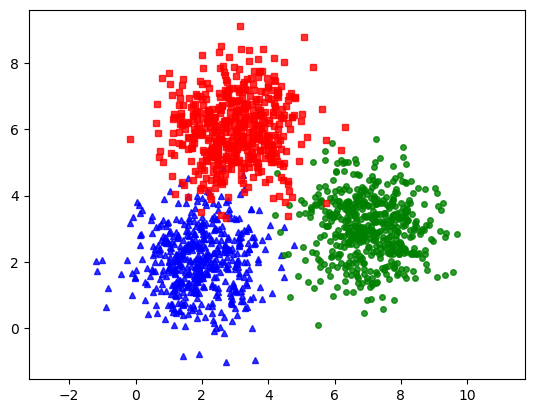

In [9]:
N, K = 500, 3
means = [[2, 2], [7, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

X, original_label = generate_data(means, cov, N, K)
kmeans_display(X, original_label)

You will need to fill in the ```YOUR CODE HERE``` to finish K-means clustering algorithm

### Implementation (4 points)

In [10]:
# 0.5
def kmeans_init_centers(X, k):
    np.random.seed(seed)

    # randomly pick k rows of X as initial centers using np.random.choice function
    
    # YOUR CODE HERE
    k_index = np.random.choice(X.shape[0], k, replace=False)
    centers = X[k_index]
    return centers

In [11]:
centers = kmeans_init_centers(X, K)
assert centers.shape == (K, 2)

In [12]:
# 1
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances between data and centers using cdist
    # return index of the closest center using np.argmin

    # YOUR CODE HERE
    D = cdist(X, centers)
    closest = np.argmin(D, axis=1)
    return closest

In [13]:
assigned_labels = kmeans_assign_labels(X, centers)
assert assigned_labels.shape == (N*3, )

In [14]:
# 1
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        # take average

        # YOUR CODE HERE
        X_k = X[labels == k]
        centers[k] = np.mean(X_k, axis=0)
        
    return centers

In [15]:
# 0.5
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same

    # YOUR CODE HERE
    return np.array_equal(centers, new_centers)

In [16]:
# 1
def kmeans(X, K):
    # save the center coordinates of each iteration
    centers = [kmeans_init_centers(X, K)]  
    # save the labels of each iteration
    labels = []
    it = 0 
    while True:
        # at each iteration:
        # 1. assign label for each points and append to labels
        # 2. update the centers
        # 3. check the convergence condition
        #    and append NEW center coordinates to centers
        # 4. update iteration 

        # YOUR CODE HERE
        center = centers[-1]
        label = kmeans_assign_labels(X, center)
        labels.append(label)
        new_center = kmeans_update_centers(X, label, K)
        centers.append(new_center)
        it += 1
        if has_converged(center, new_center):
            break       
    return (centers, labels, it)

Centers found by k-means algorithm:
[[2.96402177 6.01105837]
 [7.03594941 3.05108601]
 [1.92067563 2.03188976]]


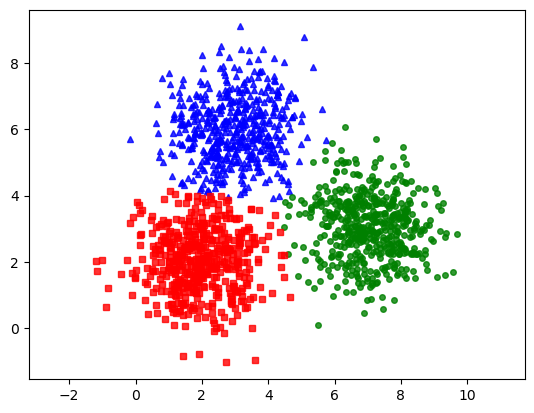

In [17]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by k-means algorithm:')
print(centers[-1])
print('='*60)

kmeans_display(X, labels[-1])

### Answer the following questions (bonus 1 point)

**Question 2:** Your comments on the result of K-means algorithm on the synthetic dataset? (0.25)

---

*Your answer here*

Ta thấy kết quả của thuật toán K-means trên tập dữ liệu trên khá tốt, phân cụm chính xác với đa số các điểm dữ liệu. Với 3 tâm cụm ban đầu là $(2,2), (7,3), (3,6)$, ta thấy rằng thuật toán K-means đã phân cụm khá chính xác các điểm dữ liệu vào 3 tâm cụm mới khá sát với tâm cụm ban đầu lần lượt là $(1.92, 2.03), (7.03, 3.05), (2.96, 6.01)$. Tuy vẫn còn một số điểm dữ liệu bị phân vào cụm sai do các điểm dữ liệu này nằm xa quá xa tâm hoặc do dữ liệu có nhiễu nhưng tổng thể kết quả của thuật toán khá tốt.

**Question 3:** 

- Drawbacks of K-means clustering algorithm (0.5)

- Propose solutions to the drawbacks you stated above (0.25)

---

*Your answer here*

1. Nhược điểm của thuật toán K-means:

- K-means cần phải biết trước số lượng cụm cần phân chia, điều này là một hạn chế lớn của thuật toán. Trong thực tế, số lượng cụm cần phân chia không phải lúc nào cũng biết trước, điều này dẫn đến việc chúng ta cần phải thử nghiệm nhiều lần với số lượng cụm khác nhau để chọn ra số lượng cụm tốt nhất.

- K-means chỉ phù hợp với dữ liệu numeric, không thể xử lý được dữ liệu categorical. Điều này là một hạn chế lớn của thuật toán khi dữ liệu thực tế thường chứa cả dữ liệu numeric và categorical.

- K-means phụ thuộc nhiều vào việc chọn điểm khởi tạo ban đầu, nếu các điểm khởi tạo ban đầu không tốt, thuật toán có thể đưa ra kết quả phân cụm không tốt

- K-means cũng dễ bị ảnh hưởng bởi nhiễu trong dữ liệu, nếu dữ liệu chứa nhiều nhiễu, kết quả phân cụm có thể không tốt.

2. Giải pháp:

- Để giải quyết vấn đề về số lượng cụm cần phân chia, ta có thể sử dụng các thuật toán phân cụm không giám sát như DBSCAN, HDBSCAN, Mean Shift, Spectral Clustering, ... để tự động xác định số lượng cụm cần phân chia.

- Để xử lý dữ liệu categorical, ta có thể sử dụng các phương pháp mã hóa dữ liệu như One-hot encoding, Label Encoding để chuyển dữ liệu categorical thành dữ liệu numeric trước khi áp dụng thuật toán K-means.

- Để giải quyết vấn đề về điểm khởi tạo ban đầu, ta có thể sử dụng các phương pháp khởi tạo điểm khởi tạo tốt như K-means++, K-means||, ...

- Để giảm ảnh hưởng của nhiễu trong dữ liệu, ta có thể sử dụng các phương pháp xử lý nhiễu như loại bỏ nhiễu, chuẩn hóa dữ liệu, xử lý missing value, .... Ngoài ra, ta cũng có thể sử dụng thuật toán K-medoids thay cho K-means vì K-medoids sẽ chọn tâm cụm là một điểm dữ liệu thực sự trong tập dữ liệu, giúp giảm ảnh hưởng của nhiễu trong dữ liệu.
